#### SUPERVISED MODELS

In [3]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk import ne_chunk
from textblob import TextBlob

# Modelling Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Modelling Helpers
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics

import matplotlib.pyplot as plt

# Download NLTK resources (if not already downloaded)
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package omw-1.4 to /Users/Shwetha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Shwetha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Shwetha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Shwetha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Shwetha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/Shwetha/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/Shwetha/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [4]:
training_data = pd.read_csv('/Users/Shwetha/Desktop/Spring 2023/Machine Learning/ML Project/all_preprocessed_data.csv')

In [5]:
# combined content for stemm and lemmetazied title and lemmatized text 
training_data.loc[:,'train_stem_lem_title_text'] = training_data.loc[:,'stem_lem_title'] + training_data.loc[:,'stem_lem_text']

#### Dealing with Nulls:

Since after stemming and lemmetazing, if all words were removed, it should not be actually worth anything. Since we would be counting things and vectorizing them, putting them as empty strings is the right way to go. 

In [6]:
training_data.isnull().sum()

Unnamed: 0                    0
id                            0
title                         0
author                        0
text                          1
label                         0
utterances                    0
total_utterances              0
word_count                    0
word_count_nltk               0
title_length                  0
Length_bucket                 0
author_bool                   0
clean_text                   16
clean_title                   1
clean_authors                 0
stem_text                     0
stem_title                    0
stem_lem_text                16
stem_lem_title                3
train_stem_lem_title_text    19
dtype: int64

In [7]:
#filling nulls with empty strings
training_data.loc[:,'train_stem_lem_title_text'] = training_data.loc[:,'train_stem_lem_title_text'].fillna('')

training_data.loc[:,'stem_lem_text'] = training_data.loc[:,'stem_lem_text'].fillna('')

In [8]:
# Dividing the training set by using train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data.loc[:,'train_stem_lem_title_text'], training_data.label, test_size=0.20, random_state=0)

### Summary Table for Model Assessment

In [9]:
def performance_metrics(data_name, model, X_train, X_test, y_train, y_test):
    '''
    Given a machine learning model (from a python package), fit the model to the
    data and compute accuracy metrics. We also call other funtions to create summary 
    plots of the accuracy information.

    Inputs:
        data_name (str)
        model (class): pre-made machine learning model to call on the data
        X_train (pandas df): feature training data
        X_test (pandas df): feature testing data
        y_train (pandas df): label in training data
        y_test (pandas df): label in testing data

    Returns (tuple) of the following accuracy metrics: 
        training accuracy, test accuracy, precision, recall, f1
    '''
    print("Status: training {} model using {} data".format(model, data_name))

    model.fit(X_train, y_train)

    # Predictions
    y_predict = model.predict(X_test)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
   

    # Call Plot Functions
    confusion_matrix_plot(y_test, y_predict)
    all_performance_bar(accuracy_train, accuracy_test, precision, recall, f1)

    return (accuracy_train, accuracy_test, precision, recall, f1)


def confusion_matrix_plot(y_test, y_predict):
    '''
    Function to make a confusion matrix given machine learning model results

    Inputs:
        y_test (pandas df): label in testing data
        y_predict (pandas df): predicted label based on machine learning model
    '''
    confusion_matrix_out = confusion_matrix(y_test, y_predict, labels = [1, 0])
    disp = ConfusionMatrixDisplay(confusion_matrix_out, display_labels =
                                   ['1 - Unreliable News', '0 - Reliable News'])
    disp.plot()


def all_performance_bar(accuracy_train, accuracy_test, precision, recall, f1):
    '''
    Function to make a bar cart with the different accuracy metrics from the 
    machine learning model

    Inputs:
        accuracy_train (float): Trainig Accuracy of the machine learning model
        accuracy_test (float): Testing Accuracy of the machine learning model
        precision (float): Precision of the machine learning model
        recall (float): Recall of the machine learning model
        f1 (float): F1 score of the machine learning model
    '''
    x = ['Accuracy_Training', 'Accuracy_Test', 'Precision', 'Recall', 'F1_score']
    y = [accuracy_train, accuracy_test, precision, recall, f1]

    fig = plt.figure(figsize = (8, 5))    
    plt.bar(x, y, color ='maroon', width = 0.4)  
    plt.xlabel("Performance Metric")
    plt.ylabel("Score")
    plt.title("Model Performance Metrics Summary")
    plt.show()

In [10]:
##Initialize Summary Table Pandas DF  (THIS IS MEANT TO BE RUN JUST ONCE)
summary_df = pd.DataFrame(columns = [
    'Model Data', 'Model Type ', 'Accuracy_Training',
      'Accuracy_Test', 'Precision',
    'Recall', 'F1_score'])

### Feature Creation

**Text-based features**

Word count: The number of words in the article text.

Sentence count: The number of sentences in the article text.

Average word length: The average length of words in the article text.

In [11]:
training_data['word_count'] = (
    training_data.loc[:,'train_stem_lem_title_text'].apply(
        lambda x: len(x.split())))
training_data['sentence_count'] = (
    training_data.loc[:,'train_stem_lem_title_text'].apply(
        lambda x: len(x.split('.'))))
training_data['average_word_length'] = (
    training_data.loc[:,'train_stem_lem_title_text'].apply(
        lambda x: np.mean([len(word) for word in x.split()])))

/Users/Shwetha/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [12]:
X = training_data[['word_count', 'sentence_count', 'average_word_length']]
X.isnull().sum()

X.loc[:,'average_word_length'] = X.loc[:,'average_word_length'].fillna(0)

/var/folders/7q/zn6qdz397b17ffmwjjl_xykh0000gn/T/ipykernel_30934/1087649469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'average_word_length'] = X.loc[:,'average_word_length'].fillna(0)


**Count vectorizer:**

The Count Vectorizer generates an encoded vector that
contains the length of the entire vocabulary coupled with the frequency of each word by which it appears in the document. It converts a collection of text to a vector of term and token counts.

We experiment with both an n_gram range of unigrams and bigrams since choosing unigrams and bigrams for tasks such as text classification was recommended in the literature we read, since choosing a higher ngram size would cause the number of possible n-grams to grow exponentially, which can lead to sparsity issues and overfitting. 

In [13]:
#Count vectorizer of 1gram features only
count_vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

#Count vectorizer of 1gram and 2 gram features
count_vectorizer_2gram = CountVectorizer(ngram_range=(1, 2), 
                                         stop_words='english') 
count_train_2gram = count_vectorizer_2gram.fit_transform(X_train)
count_test_2gram = count_vectorizer_2gram.transform(X_test)

**TF-IDF Vectorizer:**

TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

IDF (Inverse Document Frequency): Words that occur many times in a document, but also occur many times in many other docs, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TD-IDF Vectorizer will convert the documents into tokens, learn the vocabulary and inverse document frequency weightings, and allow us to encode new documents.

We choose the ngram_range for similar reasons as the count vectorizer.

In [14]:
#TF-idf vectorizer vectorizer of 1gram features only
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

#Initialize the `tfidf_vectorizer` of 1gram and 2 gram features
tfidf_vectorizer_2gram = TfidfVectorizer(stop_words='english',
                                          ngram_range=(1, 2))
tfidf_train_2gram = tfidf_vectorizer_2gram.fit_transform(X_train)
tfidf_test_2gram = tfidf_vectorizer_2gram.transform(X_test)

In [15]:
# to use to add to summary table
data_tf_idf = 'tf-idf-lemmatized'
data_count = 'count-lemmatized'
data_text = 'text-based-features'

#### Naive Bayes using Count Vectorization

Naive Bayes is a popular machine learning algorithm for detecting fake news because of its simplicity, efficiency, and effectiveness. The algorithm works well in situations where the data has a large number of features and the features are independent of each other, as is the case in natural language processing tasks like fake news detection. The algorithm can effectively model the many different factors that might be indicative of fake news, such as the language used in the article, the sources cited, and the overall sentiment. As Naive Bayes is a probabilistic algorithm, it  assigns probabilities to different outcomes. This  allows the algorithm to not only detect whether an article is fake, but also to quantify how likely it is to be fake. 

We have used multinomial Naive Bayes as it performs well on text classification tasks, can handle missing data well and is robust to irrelevant features.

Status: training MultinomialNB() model using count-lemmatized data


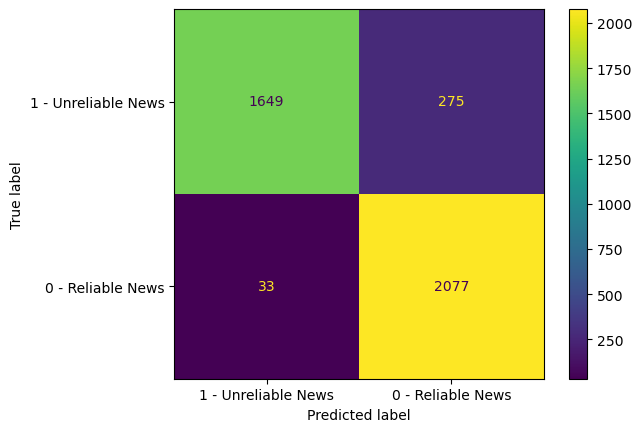

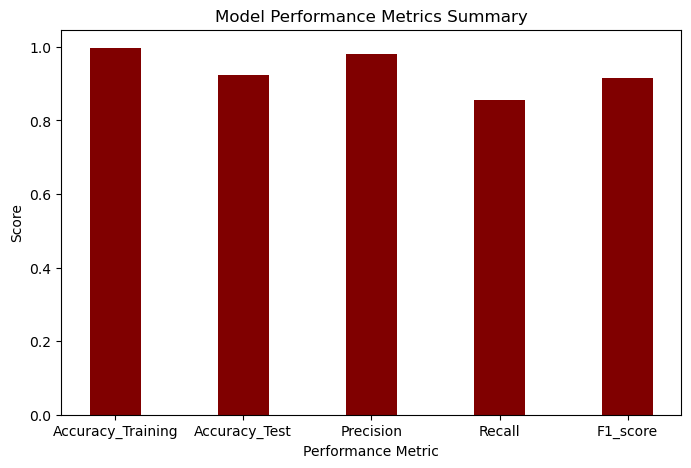

In [50]:
model_nb = MultinomialNB()

data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model_nb, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model_nb, accuracy_train, 
    accuracy_test, precision, recall, f1] 

#### Naive Bayes using TF-IDF Vectorizer

Status: training MultinomialNB() model using tf-idf-lemmatized data


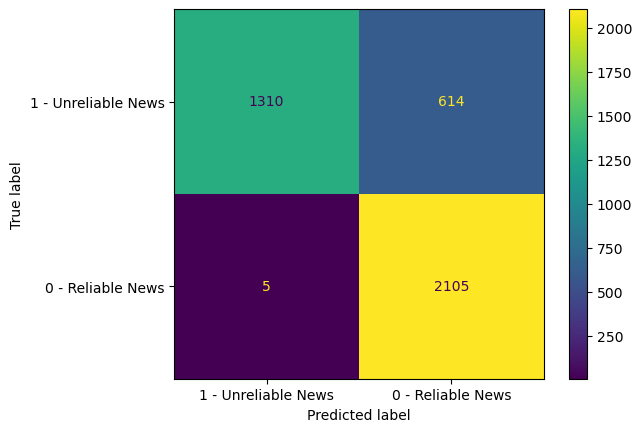

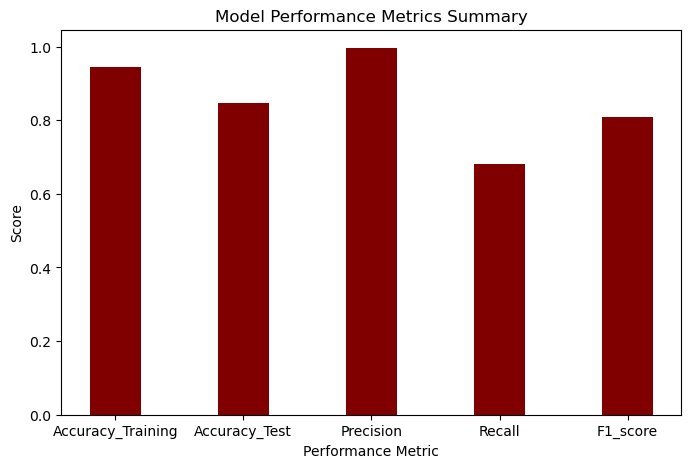

In [51]:
model_nb = MultinomialNB()

data_name = data_tf_idf

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model_nb, tfidf_train_2gram, tfidf_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model_nb, accuracy_train, 
    accuracy_test, precision, recall, f1]

As the count vectorizer and tf-idf are discrete features, the multinomial model was implemented. This model had a 92% accuracy and 91% F1 with count vectorizer as a feature and 99% accuracy and 80% F1 score with tf-idf as a feature. The difference in scores between the two can be for a variety of reasons such as the information content or the characteristics of the corpus. For example, TF-IDF can emphasize features with a higher discriminative power and can lead to different classification compared to CountVectorizer. Furthermore, if the dataset contains many repetitive or non-discriminatory words that occur frequently across different classes, CountVectorizer may assign higher weights to these less informative features. In such cases, TF-IDF, by considering the inverse document frequency, could better downweight those common words, thus classifying it differently.

#### Top Features for Navie Bayes Model

In [63]:

feature_names = list(count_vectorizer_2gram.vocabulary_.keys())
neg_class_prob_sorted = model_nb.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = model_nb.feature_log_prob_[1, :].argsort()[::-1]

neg_class_top_features = np.take(feature_names, neg_class_prob_sorted[:30])
pos_class_top_features = np.take(feature_names, pos_class_prob_sorted[:30])

# Print top features and their corresponding probabilities for the negative class
print("Top Features for Reliable News:")
for feature in neg_class_top_features:
    feature_index = feature_names.index(feature)
    feature_prob = model_nb.feature_log_prob_[0, feature_index]
    print(f"Feature: {feature}\t\tProbability: {feature_prob}")



Top Features for Reliable News:
Feature: everywher si		Probability: -9.023673288704806
Feature: leagu winchest		Probability: -9.364940168406655
Feature: mann sir		Probability: -9.503520667643997
Feature: eighti georg		Probability: -9.944442634037713
Feature: messag actress		Probability: -10.180234268159094
Feature: acceler econoday		Probability: -10.23715385785798
Feature: technolog fight		Probability: -10.240964435496526
Feature: vaccin learn		Probability: -10.256227064993457
Feature: sentenc appeal		Probability: -10.260470535823139
Feature: bednov went		Probability: -10.439995065689674
Feature: quarter hous		Probability: -10.440796924340372
Feature: hut wind		Probability: -10.553472888442432
Feature: difficult pain		Probability: -10.5733656923917
Feature: accord meer		Probability: -10.636616298331102
Feature: abdolrasoul		Probability: -10.697526880498947
Feature: syria hand		Probability: -10.70609209554436
Feature: investig journal		Probability: -10.718698300250697
Feature: forti mex

In [64]:
# Print top features and their corresponding probabilities for the positive class
print("\nTop Features for Unreliable News:")
for feature in pos_class_top_features:
    feature_index = feature_names.index(feature)
    feature_prob = model_nb.feature_log_prob_[1, feature_index]
    print(f"Feature: {feature}\t\tProbability: {feature_prob}")


Top Features for Unreliable News:
Feature: vitamin best		Probability: -9.763882430654377
Feature: mann sir		Probability: -9.87125228498386
Feature: messag actress		Probability: -9.97148016546332
Feature: mr mont		Probability: -10.09437106508178
Feature: claim alway		Probability: -10.347968687785416
Feature: sentenc appeal		Probability: -10.399204961127278
Feature: control crown		Probability: -10.546658278739425
Feature: vaccin learn		Probability: -10.549391166586469
Feature: quarter hous		Probability: -10.553396633421812
Feature: jockey ayatollah		Probability: -10.587199407655334
Feature: anthoni davi		Probability: -10.591119139500456
Feature: reconcil brown		Probability: -10.604916744310053
Feature: woke follow		Probability: -10.615600766351932
Feature: justic summarili		Probability: -10.699660767614418
Feature: rubbish negoti		Probability: -10.738396128634207
Feature: presid libr		Probability: -10.763061782881227
Feature: investig journal		Probability: -10.770279666583875
Feature: d

We extracted the top features for both reliable and unreliable news for the CountVectorizer model. We continue to see similar trends where certain words associated with right-leaning ideologies such as ‘jockey ayatollah’ and ‘woke follow’ are important features for predicting unreliable news. At the same time, certain n-grams are repeated as top features in both labels such as ‘mann sir’ and ‘vaccin learn’. This could be because this model assumes independence among features but it is possible and likely that it isn’t the case and that the model can’t capture more complex relationships and correlations between features. 

#### Support Vector Machines (SVM) using Count Vectorizer

Support Vector Machines (SVMs) work by finding the best hyperplane that separates the training data into different classes, with the goal of maximizing the margin between the two classes. 

SVMs have been used for fake news detection with some success, especially when the classification problem is highly nonlinear and the data has a large number of features. SVMs can be particularly useful when dealing with imbalanced datasets, where there are many more examples of one class than the other, as SVMs can often achieve good performance even with limited data from the minority class. SVMs can be sensitive to the choice of hyperparameters, such as the regularization parameter and kernel type, which can make them more difficult to tune and optimize than some other classification algorithms.

We have implemented a linear SVM as data on fake news prediction is linearly separable and has low computational cost making it a simple, interpretable model for fake news detection.

We trained our SVM model on other kernels such as polynomial and radial basis function to check our assumptions about the linear separability of the dataset. The Linear SVM model was the best performing one in terms of accuracy and F1 Score. 


Status: training SVC(kernel='linear') model using count-lemmatized data


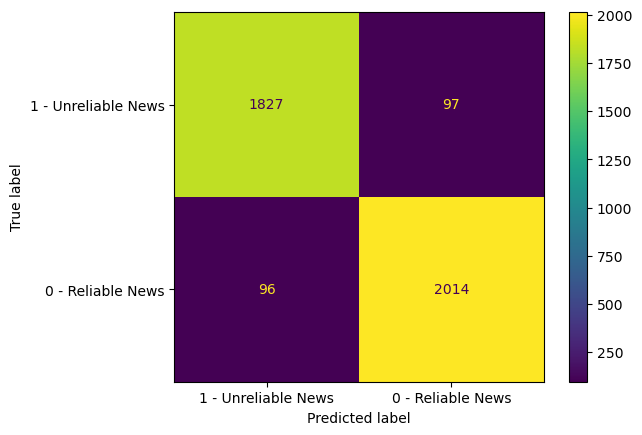

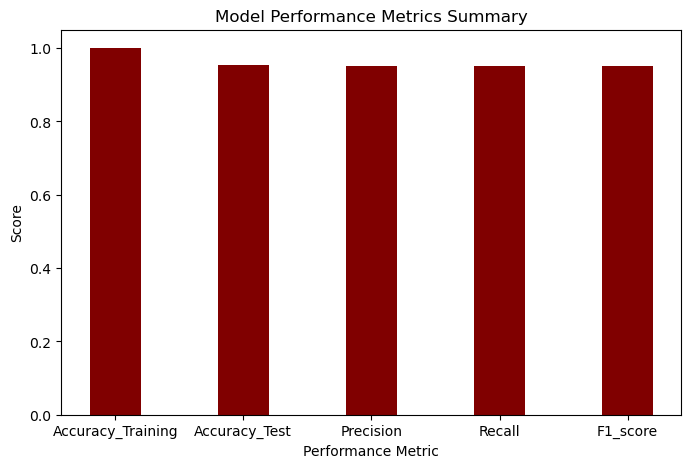

In [54]:
model = svm.SVC(kernel='linear')
data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1] 

#### Support Vector Machines Using TF-IDF Vectorizer

Status: training SVC(kernel='linear') model using tf-idf-lemmatized data


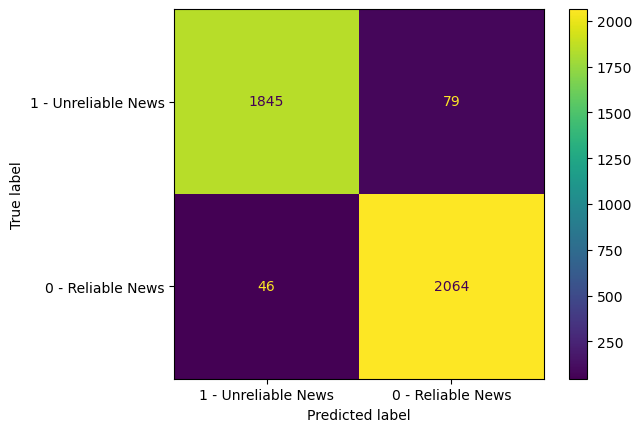

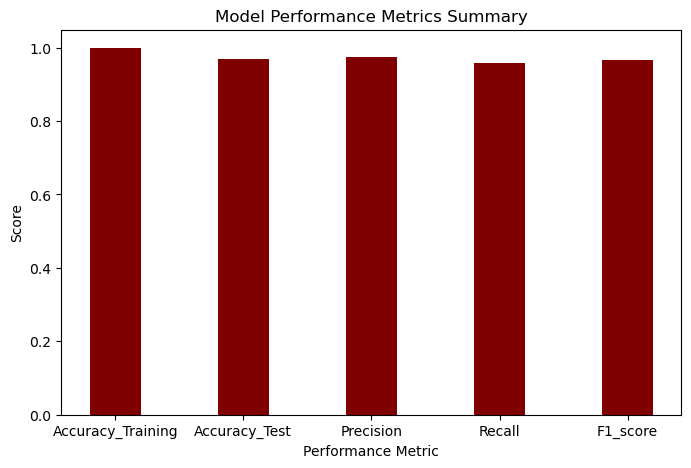

In [80]:
model = svm.SVC(kernel='linear')
data_name = data_tf_idf

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model, tfidf_train_2gram, tfidf_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model, accuracy_train, 
    accuracy_test, precision, recall, f1]

SVM using Polynomial Kernel

Status: training SVC(kernel='poly') model using count-lemmatized data


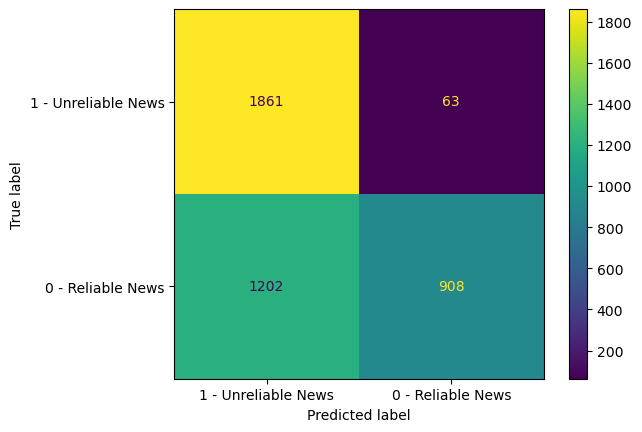

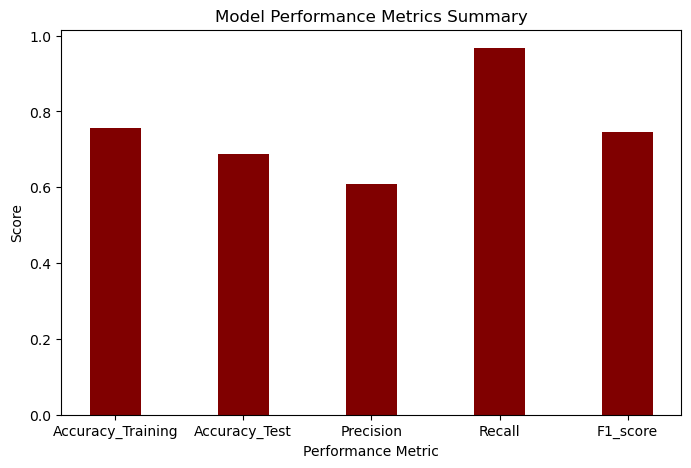

In [81]:
model_poly = svm.SVC(kernel='poly', degree=3)
data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model_poly, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model_poly, accuracy_train, 
    accuracy_test, precision, recall, f1] 

SVM using Gaussian Radial Basis Function Kernel

Status: training SVC() model using count-lemmatized data


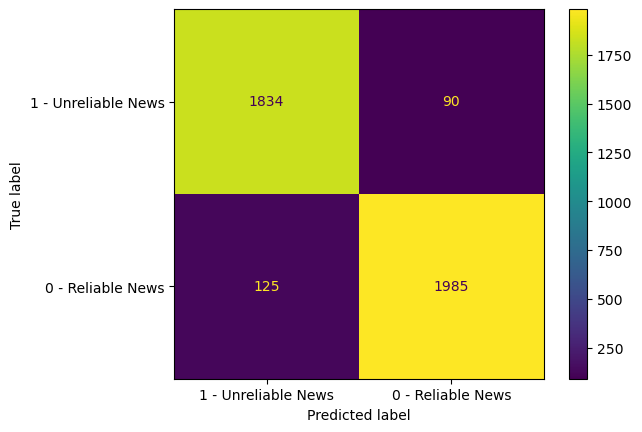

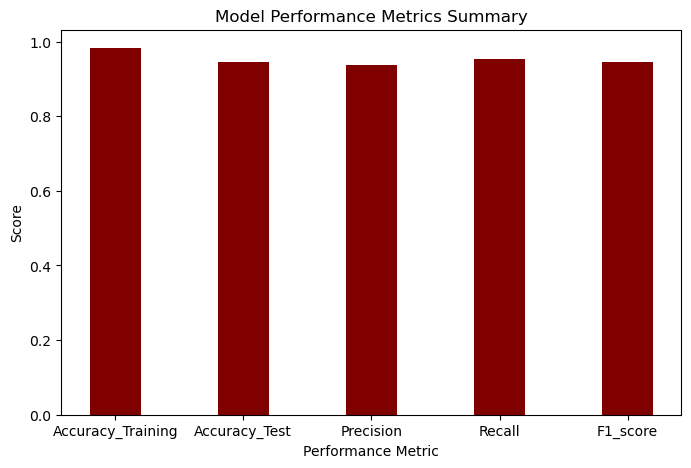

In [ ]:
model_rbf = svm.SVC(kernel='rbf')
data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model_rbf, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model_rbf, accuracy_train, 
    accuracy_test, precision, recall, f1] 

#### Random Forests using Count Vectorizer

Random forests are a type of ensemble learning method that combine multiple decision trees to make a final prediction. Each decision tree in the random forest is built independently on a subset of the training data and a subset of the features, and the final prediction is made by combining the predictions of all the individual trees.

There are some important features of random forests that make it a suitable model for fake news prediction. Random forests are less prone to overfitting and as a result have better accuracy. They can also provide insights on which features are important for classification. 

We extracted the most important features for classification for our TF-IDF random forest model (Appendix 2) and the results show there is some overlap between the important features extracted for the logistic regression and naive bayes model. Furthermore, the importance of each single feature is extremely low which is to be expected considering the large corpus of words. 

We also fine-tuned the hyperparameter - number of estimators - for our model. We ran the model for a range of estimators from 25 to 200 and found that the model performed best when the number of estimators was 125. As we increase the number of parameters, the performance of our model improves but it takes longer to run our model.  


Status: training RandomForestClassifier(n_estimators=25, random_state=0) model using tf-idf-lemmatized data


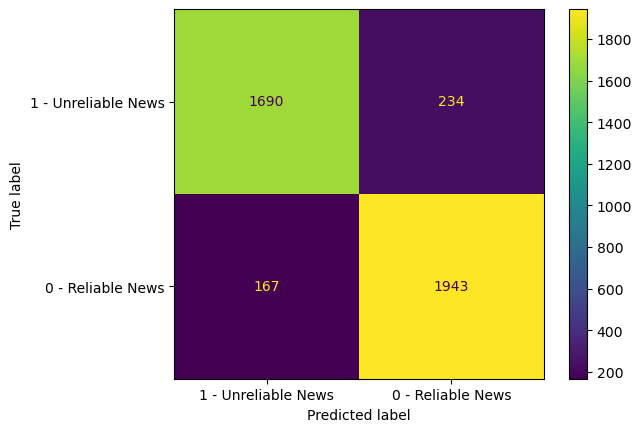

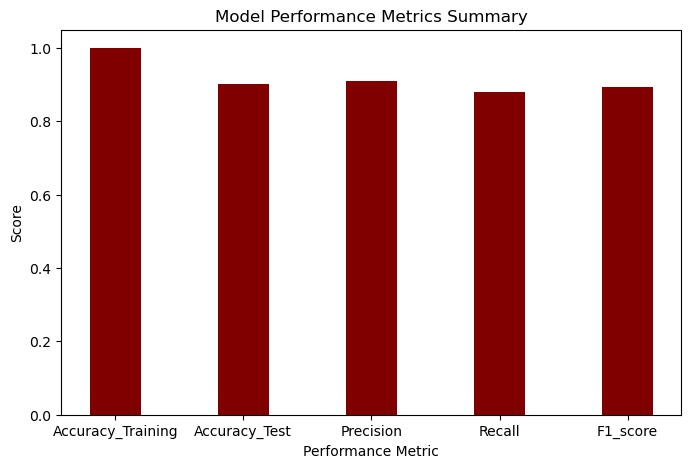

Status: training RandomForestClassifier(n_estimators=50, random_state=0) model using tf-idf-lemmatized data


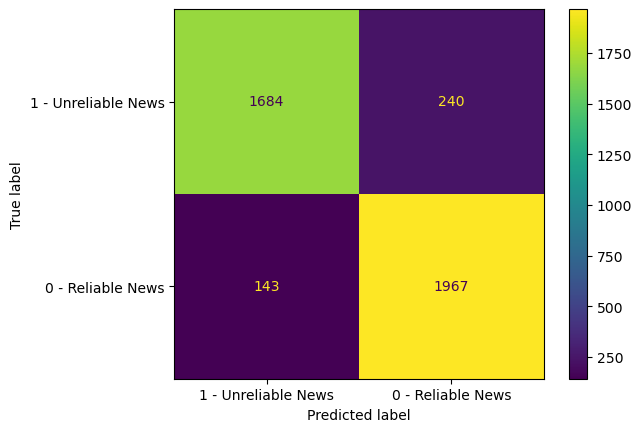

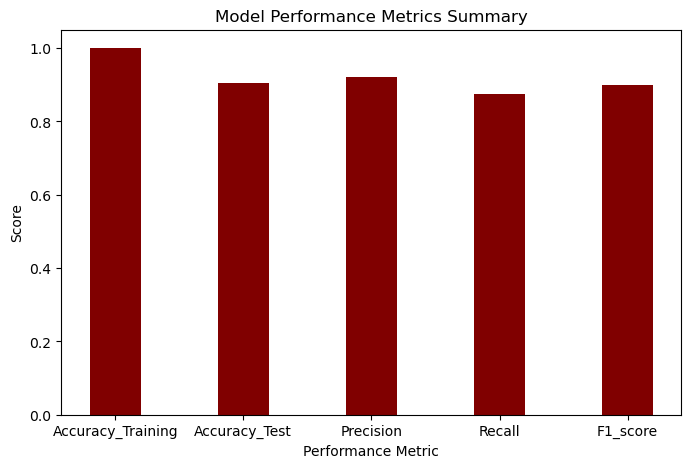

Status: training RandomForestClassifier(n_estimators=75, random_state=0) model using tf-idf-lemmatized data


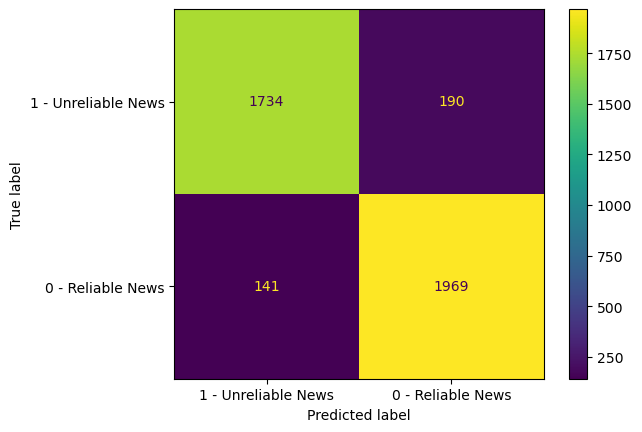

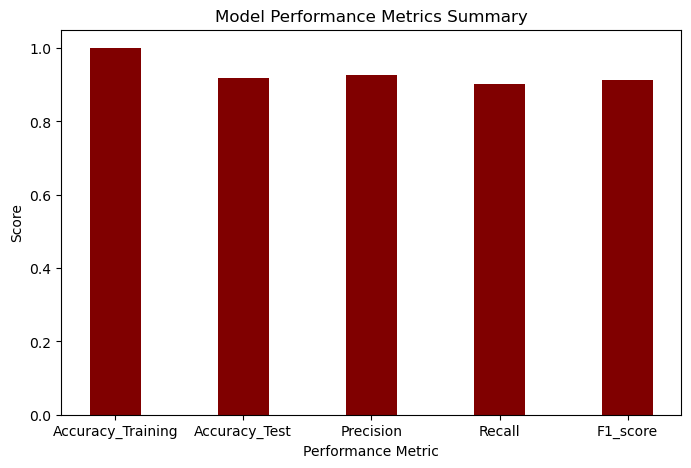

Status: training RandomForestClassifier(random_state=0) model using tf-idf-lemmatized data


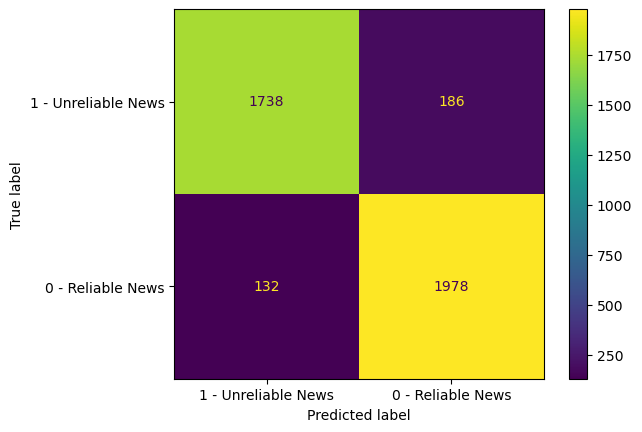

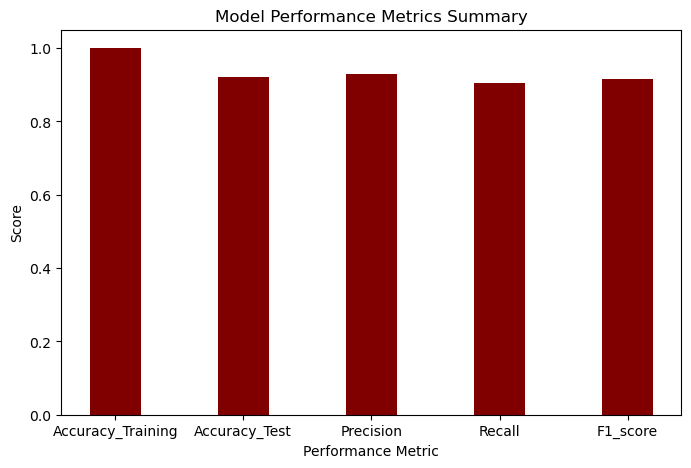

Status: training RandomForestClassifier(n_estimators=125, random_state=0) model using tf-idf-lemmatized data


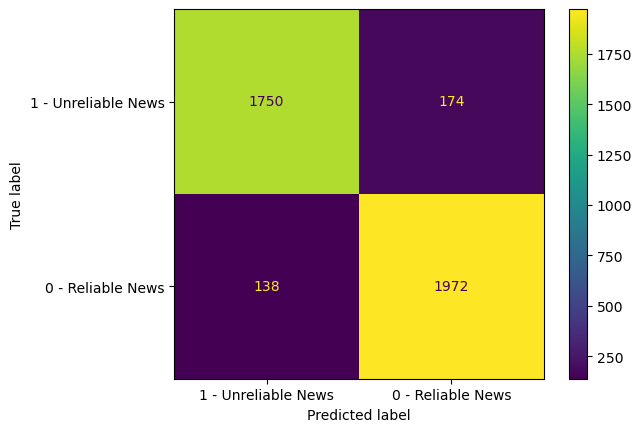

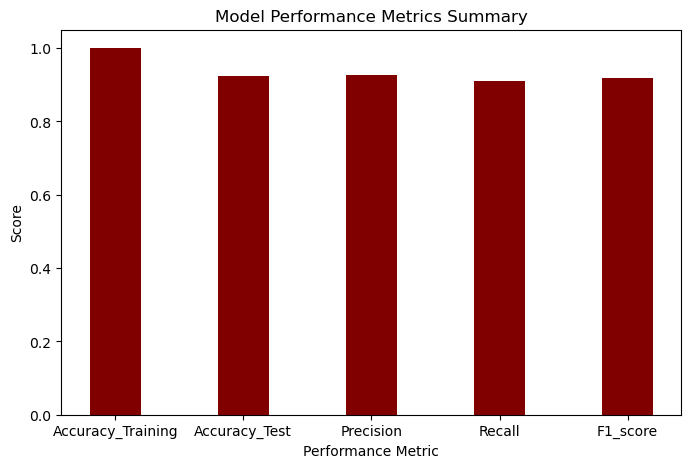

Status: training RandomForestClassifier(n_estimators=150, random_state=0) model using tf-idf-lemmatized data


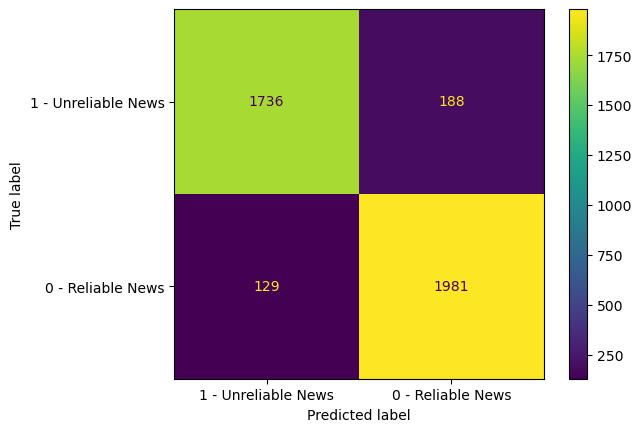

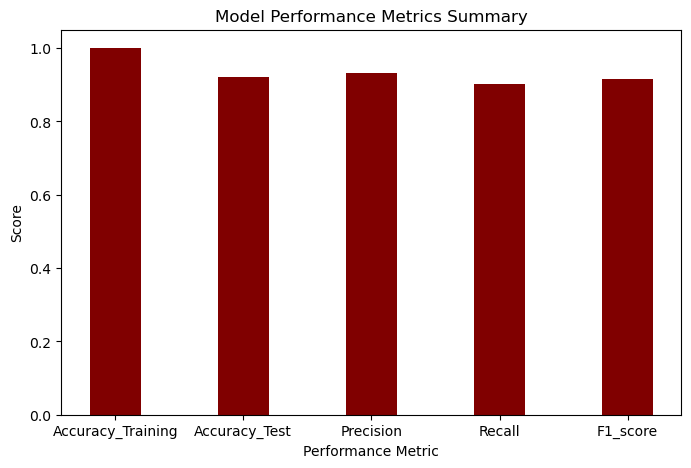

Status: training RandomForestClassifier(n_estimators=175, random_state=0) model using tf-idf-lemmatized data


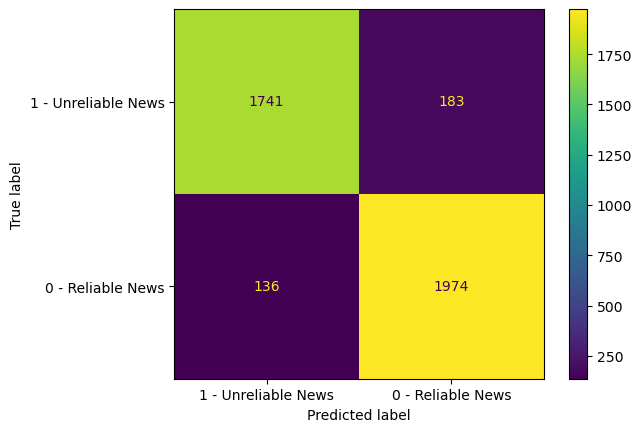

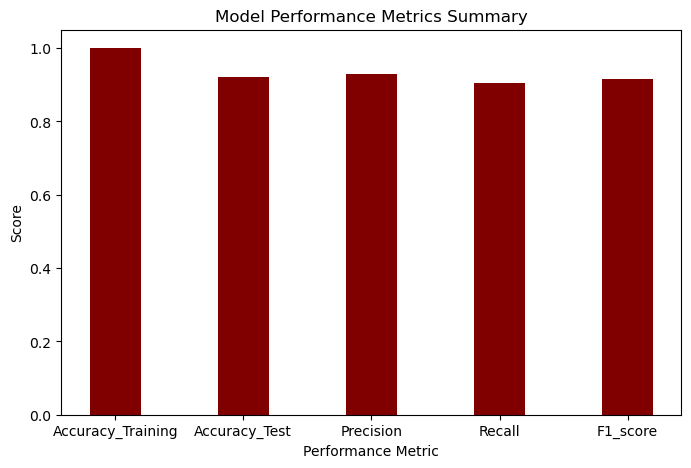

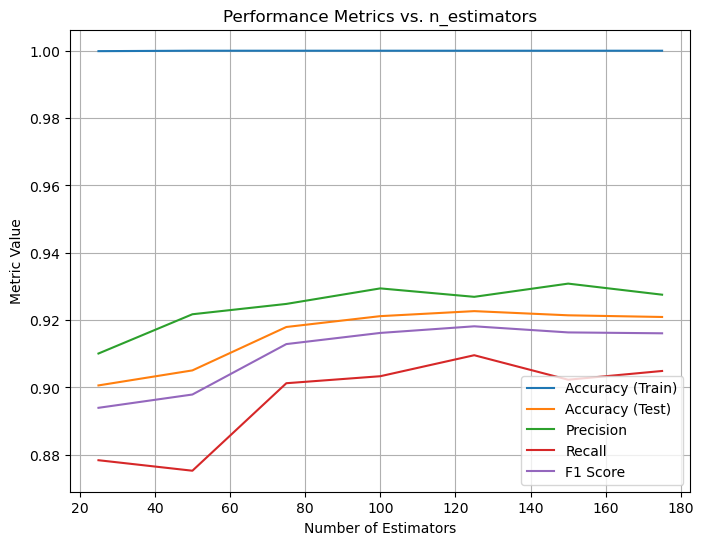

In [ ]:
n_values = np.arange(25, 200, 25)

accuracy_train_values = []
accuracy_test_values = []
precision_values = []
recall_values = []
f1_values = []

for n_estimators in n_values:
    # Create a new model with the current max_iter value
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    # Fit the model on the training data
    model.fit(count_train_2gram, y_train)

    # Evaluate the model on the training and test data
    accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
        data_name, model, count_train_2gram, count_test_2gram, y_train, y_test)

    # Append the metric values to the respective lists
    accuracy_train_values.append(accuracy_train)
    accuracy_test_values.append(accuracy_test)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

# Plot the metric values against max_iter values
plt.figure(figsize=(8, 6))
plt.plot(n_values, accuracy_test_values, label='Accuracy (Test)')
plt.plot(n_values, precision_values, label='Precision')
plt.plot(n_values, recall_values, label='Recall')
plt.plot(n_values, f1_values, label='F1 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. n_estimators')
plt.legend()
plt.grid(True)
plt.show()


Based on this, the ideal number of estimators is 125 as it maximizes the accuracy and F1 score.

Status: training RandomForestClassifier(n_estimators=125, random_state=0) model using count-lemmatized data


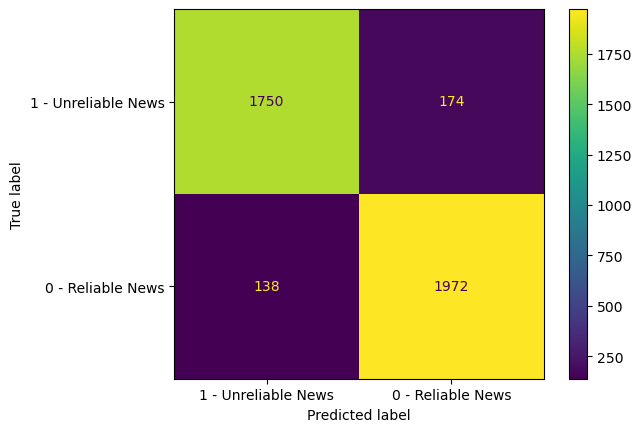

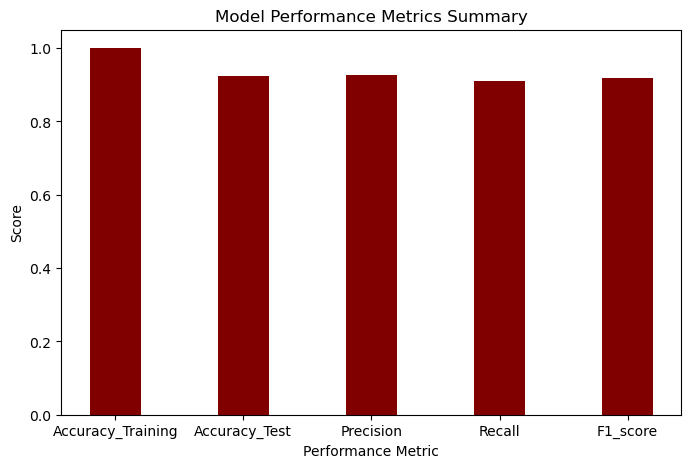

In [83]:
model_rfc = RandomForestClassifier(n_estimators=125, random_state=0)
data_name = data_count

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model_rfc, count_train_2gram, count_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model_rfc, accuracy_train, 
    accuracy_test, precision, recall, f1] 

#### Random Forests Using TF-IDF Classifier

Status: training RandomForestClassifier(n_estimators=125, random_state=0) model using tf-idf-lemmatized data


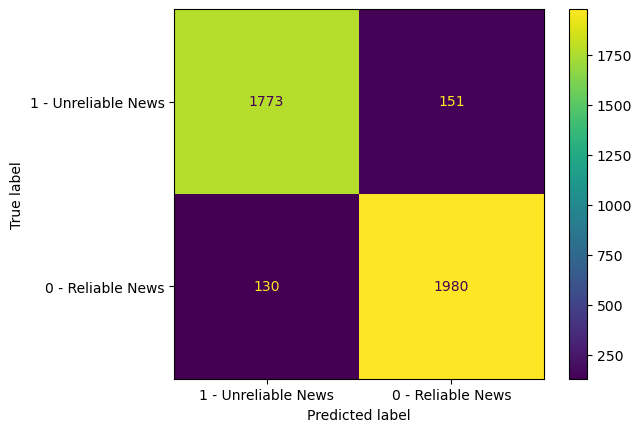

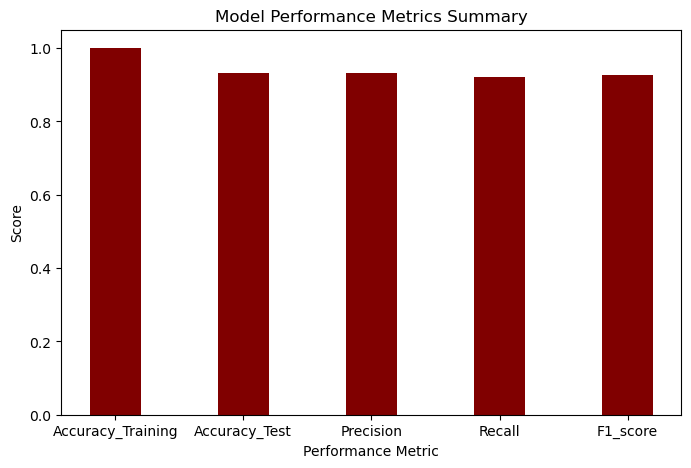

In [67]:
model_rfc = RandomForestClassifier(n_estimators=125, random_state=0)
data_name = data_tf_idf

accuracy_train, accuracy_test, precision, recall, f1 = performance_metrics(
    data_name, model_rfc, tfidf_train_2gram, tfidf_test_2gram, y_train, y_test)

#add accuracy to final summary table
summary_df.loc[len(summary_df)] = [data_name, model_rfc, accuracy_train, 
    accuracy_test, precision, recall, f1]

### Top Features for Random Forest Classifier

In [79]:

feature_names = list(tfidf_vectorizer_2gram.vocabulary_.keys())

# Retrieve feature importances
importances = model_rfc.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

# Extract the top 30 most important features
top_features = sorted_indices[:30]
top_features = np.array(top_features)

top_feature_names = [feature_names[i] for i in top_features]

for feature_name, importance in zip(top_feature_names, importances[top_features]):
    print(f"Feature: {feature_name}\t\tImportance: {importance}")


Feature: leagu winchest		Importance: 0.009578554861204888
Feature: syria hand		Importance: 0.007711597354449654
Feature: abdolrasoul		Importance: 0.006936382583147403
Feature: everywher si		Importance: 0.005849749878172425
Feature: irregular nune		Importance: 0.0034024296950169197
Feature: snowden launch		Importance: 0.0029342689040036465
Feature: mr mont		Importance: 0.0028977690487274623
Feature: jockey ayatollah		Importance: 0.002755146636810198
Feature: control crown		Importance: 0.002714681009471531
Feature: rico mani		Importance: 0.002384475563542574
Feature: plenti digit		Importance: 0.0020612367454196532
Feature: justic summarili		Importance: 0.00187787440351363
Feature: technolog fight		Importance: 0.0018622171518563363
Feature: obamacar quit		Importance: 0.001815305560399654
Feature: art manhattan		Importance: 0.0017080811746800462
Feature: plant locat		Importance: 0.0016478773042778213
Feature: acceler econoday		Importance: 0.0016046152814203304
Feature: car flash		Importanc

In [86]:
#THIS IS MEANT TO BE RUN JUST ONCE AT THE END
#After all models run, print the final summary table:
summary_df

,Model Data,Model Type,Accuracy_Training,Accuracy_Test,Precision,Recall,F1_score
0,text-based-features,LogisticRegression(),0.688693,0.693109,0.690768,0.645530,0.667383
1,count-lemmatized,LogisticRegression(C=100000.0),1.000000,0.958850,0.956386,0.957380,0.956883
2,tf-idf-lemmatized,LogisticRegression(C=100000.0),1.000000,0.969757,0.976720,0.959459,0.968013
3,count-lemmatized,LogisticRegression(C=1),1.000000,0.959841,0.955533,0.960499,0.958009
4,count-lemmatized,"LogisticRegression(C=1, penalty='l1', solver='...",0.999876,0.962568,0.960519,0.961019,0.960769
5,tf-idf-lemmatized,"LogisticRegression(C=1, penalty='l1', solver='...",0.944706,0.941745,0.946589,0.930353,0.938401
6,tf-idf-lemmatized,LogisticRegression(C=1),0.983573,0.952652,0.960659,0.939189,0.949803
7,count-lemmatized,PassiveAggressiveClassifier(max_iter=7),1.000000,0.954140,0.950752,0.953222,0.951985
8,tf-idf-lemmatized,PassiveAggressiveClassifier(max_iter=7),1.000000,0.970501,0.980309,0.957380,0.968709
9,count-lemmatized,MultinomialNB(),0.997396,0.923649,0.980380,0.857069,0.914587


Data Representation: Both count-lemmatized and tf-idf-lemmatized data representations yield comparable performance. TF-IDF seems to provide a slight advantage in capturing the importance of individual words in the text.

Among our supervised models, SVM  performed the best. This model had a high accuracy rate and a high F1 score. These scores indicate a good balance between precision and recall, implying that the models perform well in identifying fake news while minimizing both false positives and false negatives. Common among the better performing models was the use of TF-IDF vectorizer that takes into account relative importance and contextual information, making it best suited for our task. 

#### Additional Features

In this section, we create some additional features that will be used in the next stage of our project to improve our models. 

**Sentiment Analysis**

Sentiment analysis can be a useful tool for fake news detection, as fake news articles often contain language that is emotionally charged or misleading in order to manipulate readers' emotions. We will consider two measures of sentiment analysis: polarity and subjectivity as we think that would be most relevant for fake news detection task. 

In [87]:
def sentiment_scores(text):
    sentiment = TextBlob(text)
    return sentiment.polarity, sentiment.subjectivity


training_data['sentiment'] = training_data['clean_text'].astype(str).apply(sentiment_scores)


In [90]:
sentiments = training_data[['label', 'sentiment']]
sentiments['polarity_val'] = sentiments['sentiment'].str[0]
sentiments['subjectivity_val'] = sentiments['sentiment'].str[1]

/var/folders/7q/zn6qdz397b17ffmwjjl_xykh0000gn/T/ipykernel_30934/1844310795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments['polarity_val'] = sentiments['sentiment'].str[0]
/var/folders/7q/zn6qdz397b17ffmwjjl_xykh0000gn/T/ipykernel_30934/1844310795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments['subjectivity_val'] = sentiments['sentiment'].str[1]


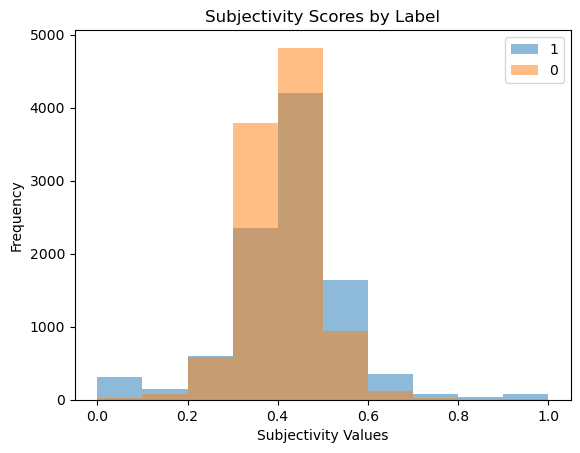

In [93]:
# Create a dictionary to store sentiment values for each label
sentiment_by_label = {}

# Group sentiment values by label
for sentiment, label in zip(sentiments['subjectivity_val'], sentiments['label']):
    if label not in sentiment_by_label:
        sentiment_by_label[label] = []
    sentiment_by_label[label].append(sentiment)

# Plot histograms for each label
for label, values in sentiment_by_label.items():
    plt.hist(values, bins=10, alpha=0.5, label=label)

# Set labels and title
plt.xlabel('Subjectivity Values')
plt.ylabel('Frequency')
plt.title('Subjectivity Scores by Label')

# Add a legend
plt.legend()

# Display the plot
plt.show()

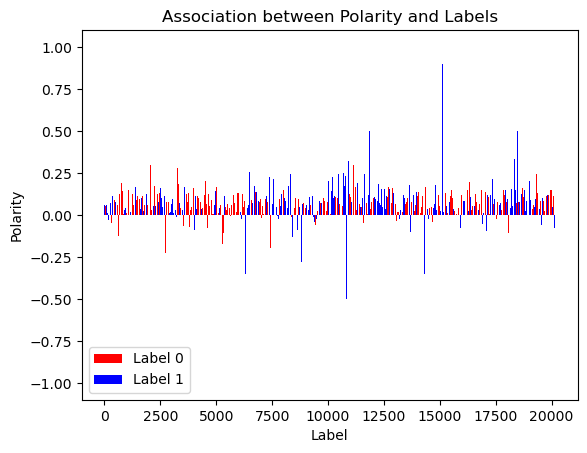

In [95]:

group_data = sentiments.groupby('label')['polarity_val']
color_map = {0: 'red', 1: 'blue'}

for label, color in color_map.items():
    label_data = sentiments[sentiments['label'] == label]
    plt.bar(label_data.index, label_data['polarity_val'], color=color, label=f'Label {label}')

plt.title('Association between Polarity and Labels')
plt.xlabel('Label')
plt.ylabel('Polarity')
plt.legend()
plt.show()


Based on an initial analysis, polarity scores don’t seem to correlate with news being reliable or unreliable. On the other hand, subjectivity scores are more spread out for unreliable news, indicating that unreliable news is more subjective than reliable news. 

**Parts of Speech Tagging**

Parts of speech (POS) can be a good feature for fake news detection because they provide information about the grammatical structure of a sentence, which can be indicative of the author's intent and writing style. For example, fake news articles may use different parts of speech than legitimate news articles in order to make their content more sensational or misleading.

In [97]:
training_data['pos_tag'] = training_data['clean_text'].astype(str).apply(lambda x: nltk.pos_tag(word_tokenize(x)))
training_data['pos_tag'].head()

0    [(by, IN), (darrell, NN), (lucus, NN), (on, IN...
1    [(ever, RB), (get, VB), (the, DT), (feeling, N...
2    [(october, RB), (twenty-nine, JJ), (two, CD), ...
3    [(videos, IN), (the, DT), (rate, NN), (at, IN)...
4    [(print, NN), (an, DT), (iranian, JJ), (woman,...
Name: pos_tag, dtype: object

**Named Entity Recognition (NER)**

Named entity recognition (NER) can be a good feature for fake news detection because it can identify entities mentioned in the news article and provide context on what they refer to. This information can be used to detect patterns or anomalies in the way entities are mentioned, which can be indicative of fake news.

In [98]:
def named_entity_recognition(tagged_tokens):
    chunked = nltk.ne_chunk(tagged_tokens)
    return chunked

training_data['named_entities'] = training_data['pos_tag'].apply(named_entity_recognition)
training_data['named_entities'].head()

0    [(by, IN), (darrell, NN), (lucus, NN), (on, IN...
1    [(ever, RB), (get, VB), (the, DT), (feeling, N...
2    [(october, RB), (twenty-nine, JJ), (two, CD), ...
3    [(videos, IN), (the, DT), (rate, NN), (at, IN)...
4    [(print, NN), (an, DT), (iranian, JJ), (woman,...
Name: named_entities, dtype: object

#### Next Steps

The next steps would be to finetune the model using additional features such as sentiment analysis, parts of speech, named entity recognition and simple topic modeling to see whether the inclusion of additional features improves model performance.